### Data Preparation

##### Loading Data

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

def parse_data(folder_path):
    """
    Parses data from the given folder path.

    Args:
        folder_path (str): The path to the folder containing the data files.

    Returns:
        pandas.DataFrame: A DataFrame containing the parsed data.
    """

    # Create an empty list to store the dataframes
    dataframes = []

    # Iterate over the files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is a CSV file
        if filename.endswith(".csv"):
            # Read the CSV file into a pandas DataFrame
            df = pd.read_csv(os.path.join(folder_path, filename),delimiter=";")
            # Append the DataFrame to the list
            dataframes.append(df)

    # Concatenate the DataFrames into a single DataFrame
    df = pd.concat(dataframes)

    return df

path = "/Users/nassim.gharbi/Code/bi_case_study/iowa_sales_data/"
df = parse_data(path)
#df = pd.read_csv("/Users/nassim.gharbi/Code/bi_case_study/iowa_sales_data/iowa_sales_000000000000.csv",delimiter=";")
display(df.head())
display(df.info())
print(df.columns)


,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,export_id
0,INV-11752100053,2018-04-27,2190,"CENTRAL CITY LIQUOR, INC.",1460 2ND AVE,DES MOINES,50314.0,POINT(-93.619787 41.60566),77,POLK,...,GLENMORANGIE PIONEER PACK,6,850,23.49,35.24,2,70.48,1.70,0.45,15
1,INV-22437200050,2019-10-10,2190,"CENTRAL CITY LIQUOR, INC.",1460 2ND AVE,DES MOINES,50314.0,POINT(-93.619787 41.60566),77,POLK,...,GLENMORANGIE PIONEER PACK,6,850,19.99,29.99,1,29.99,0.85,0.22,15
2,INV-16223700001,2018-12-11,2190,"CENTRAL CITY LIQUOR, INC.",1460 2ND AVE,DES MOINES,50314.0,POINT(-93.619787 41.60566),77,POLK,...,MAKERS MARK W/HOLIDAY ORNAMENT,6,750,17.50,26.25,30,787.50,22.50,5.94,15
3,INV-39905800031,2021-09-09,2190,"CENTRAL CITY LIQUOR, INC.",1460 2ND AVE,DES MOINES,50314.0,POINT(-93.619787 41.60566),77,POLK,...,ROYAL BRACKLA 12 YR,6,750,36.00,54.00,3,162.00,2.25,0.59,15
4,INV-30017100016,2020-09-08,2190,"CENTRAL CITY LIQUOR, INC.",1460 2ND AVE,DES MOINES,50314.0,POINT(-93.619787 41.60566),77,POLK,...,JOSE CUERVO ESPECIAL SILVER W/1L CLASSIC MARGA...,6,750,11.07,16.61,6,99.66,4.50,1.18,15


<class 'pandas.core.frame.DataFrame'>
Index: 1442671 entries, 0 to 72441
Data columns (total 25 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   invoice_and_item_number  1442671 non-null  object 
 1   date                     1442671 non-null  object 
 2   store_number             1442671 non-null  int64  
 3   store_name               1442671 non-null  object 
 4   address                  1442671 non-null  object 
 5   city                     1442671 non-null  object 
 6   zip_code                 1442671 non-null  float64
 7   store_location           1281667 non-null  object 
 8   county_number            1442671 non-null  int64  
 9   county                   1442671 non-null  object 
 10  category                 1441585 non-null  float64
 11  category_name            1441585 non-null  object 
 12  vendor_number            1442670 non-null  float64
 13  vendor_name              1442670 non-null  object

None

Index(['invoice_and_item_number', 'date', 'store_number', 'store_name',
       'address', 'city', 'zip_code', 'store_location', 'county_number',
       'county', 'category', 'category_name', 'vendor_number', 'vendor_name',
       'item_number', 'item_description', 'pack', 'bottle_volume_ml',
       'state_bottle_cost', 'state_bottle_retail', 'bottles_sold',
       'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons',
       'export_id'],
      dtype='object')


##### Data Transformations

In [79]:
#cities
df["city"].unique()

array(['DES MOINES', 'NEWTON', 'DAVENPORT', 'SPENCER', 'STORM LAKE'],
      dtype=object)

In [80]:
# filter data for desMoines

desMoines = df[df["city"]=="DES MOINES"].copy()

In [81]:
#products
desMoines.shape
desMoines["category_name"].unique()
#len(df["category"].unique())

array(['SINGLE MALT SCOTCH', 'TEMPORARY & SPECIALTY PACKAGES',
       'SPICED RUM', 'SCOTCH WHISKIES', 'BLENDED WHISKIES',
       'IRISH WHISKIES', 'CANADIAN WHISKIES', 'STRAIGHT RYE WHISKIES',
       'BOTTLED IN BOND BOURBON', 'STRAIGHT BOURBON WHISKIES',
       'SINGLE BARREL BOURBON WHISKIES',
       'AMERICAN DISTILLED SPIRITS SPECIALTY', 'TENNESSEE WHISKIES',
       'IOWA DISTILLERIES', 'WHISKEY LIQUEUR', nan, 'IMPORTED DRY GINS',
       'AMERICAN DRY GINS', 'FLAVORED GIN', 'AMERICAN SLOE GINS',
       'IMPORTED FLAVORED VODKA', 'IMPORTED VODKAS', 'AMERICAN VODKAS',
       'AMERICAN FLAVORED VODKA', 'NEUTRAL GRAIN SPIRITS', 'FLAVORED RUM',
       'IMPORTED DISTILLED SPIRITS SPECIALTY', 'GOLD RUM',
       'AGED DARK RUM', 'WHITE RUM', 'IMPORTED BRANDIES',
       'IMPORTED CORDIALS & LIQUEURS', 'AMERICAN BRANDIES',
       'COCKTAILS/RTD', 'CREAM LIQUEURS', 'AMERICAN CORDIALS & LIQUEURS',
       '100% AGAVE TEQUILA', 'COFFEE LIQUEURS', 'IMPORTED SCHNAPPS',
       'NEUTRAL GRAIN SPIRI

In [82]:
# missing values

desMoines.isna().sum()

invoice_and_item_number        0
date                           0
store_number                   0
store_name                     0
address                        0
city                           0
zip_code                       0
store_location             87471
county_number                  0
county                         0
category                     546
category_name                546
vendor_number                  1
vendor_name                    1
item_number                    0
item_description               0
pack                           0
bottle_volume_ml               0
state_bottle_cost              0
state_bottle_retail            0
bottles_sold                   0
sale_dollars                   0
volume_sold_liters             0
volume_sold_gallons            0
export_id                      0
dtype: int64

In [83]:
#TODO: Data Cleaning / Transformation
import re

# cast date column
df.date = pd.to_datetime(df.date)

#filter data for Des Moines
desMoines = df[df["city"]=="DES MOINES"].copy()

# drop nans e.g empty category names
desMoines.dropna(subset=['category_name',"vendor_number"], inplace=True)

# calculate revenue for vendor
desMoines["revenue_vendor"] = desMoines["state_bottle_cost"] * desMoines["bottles_sold"]

# add column for year, month
desMoines["year"] = desMoines["date"].dt.year
desMoines["month"] = desMoines["date"].dt.month

# Mapping function using regular expressions and ignoring case
def map_function(value):
    if isinstance(value,str):
        if re.match(r'(.*rum.*)', value, re.IGNORECASE):
            return 'rum'
        if re.match(r'(.*BRANDIES.*)', value, re.IGNORECASE):
            return 'brandy'
        elif re.match(r'.*WHISKIES.*|.*BOURBON.*|.*scotch.*', value, re.IGNORECASE):
            return 'whisky'
        elif re.match(r'(.*tequila.*|.*MEZCAl.*)', value, re.IGNORECASE):
            return 'tequila'
        elif re.match(r'.*vodka.*', value, re.IGNORECASE):
            return 'vodka'
        elif re.match(r'.*gin.*', value, re.IGNORECASE):
            return 'gin' 
        elif re.match(r'.*LIQUEUR.*', value, re.IGNORECASE):
            return 'liqueur' 
        else:
            return 'other'

# Apply the mapping function to the column
desMoines['product_family'] = desMoines['category_name'].apply(map_function)

# calculate vendor revenue
desMoines["revenue_vendor"] = desMoines["state_bottle_cost"] * desMoines["bottles_sold"]

# check mapped categories
print(desMoines.loc[:,["category_name","product_family"]].drop_duplicates())

#check nan values after cleaning
#print(desMoines.isna().sum())


                              category_name product_family
0                        SINGLE MALT SCOTCH         whisky
2            TEMPORARY & SPECIALTY PACKAGES          other
8                                SPICED RUM            rum
36                          SCOTCH WHISKIES         whisky
194                        BLENDED WHISKIES         whisky
200                          IRISH WHISKIES         whisky
217                       CANADIAN WHISKIES         whisky
397                   STRAIGHT RYE WHISKIES         whisky
461                 BOTTLED IN BOND BOURBON         whisky
463               STRAIGHT BOURBON WHISKIES         whisky
496          SINGLE BARREL BOURBON WHISKIES         whisky
624    AMERICAN DISTILLED SPIRITS SPECIALTY          other
707                      TENNESSEE WHISKIES         whisky
792                       IOWA DISTILLERIES          other
812                         WHISKEY LIQUEUR        liqueur
843                       IMPORTED DRY GINS            g

In [84]:
# set datetime index
if desMoines.index.dtype !="datetime64[ns]":
    desMoines.set_index("date", inplace=True)

## Stores

In [85]:
#stores


unique_stores = desMoines["store_name"].unique().shape
stores_w_missing_locations = desMoines[desMoines["store_location"].isna()]["store_name"].unique()
num_stores_w_missing_locations = desMoines[desMoines["store_location"].isna()]["store_name"].unique().shape

desMoines.loc[:,["store_name","address","city","store_location"]][desMoines["store_name"].isin(stores_w_missing_locations)].sort_values(by="store_name").drop_duplicates().head(20)


,store_name,address,city,store_location
date,,,,
2018-03-26,BEST FOOD MART 3 LLC,1621 UNIVERSITY AVE,DES MOINES,NaN
2021-05-21,CASEY'S GENERAL STORE #2676 / DES MOINES,2106 ECHO VALLEY DR,DES MOINES,NaN
2020-04-23,CASEY'S GENERAL STORE #45 / DES MOINES,2890 E BROADWAY AVE,DES MOINES,NaN
2021-02-19,CASH SAVER #33 / DES MOINES,1320 E EUCLID AVE,DES MOINES,NaN
2018-10-25,CENTRAL CITY 2,1501 MICHIGAN AVE,DES MOINES,POINT(-93.613739 41.60572)
2021-10-21,CENTRAL CITY 2,1501 MICHIGAN AVE,DES MOINES,NaN
2021-12-20,CENTRAL CITY 2,1501 MICHIGAN AVE,DES MOINES,POINT(-93.61374 41.605828)
2021-12-17,CENTRAL CITY 2,1460 2ND AVE,DES MOINES,POINT(-93.619788 41.605706)
2019-07-15,"CENTRAL CITY LIQUOR, INC.",1460 2ND AVE,DES MOINES,POINT(-93.619787 41.60566)


## Total Market

##### Market Growth

/var/folders/np/x7dj_x5x1yx89qsg0fp5bq8c0000gr/T/ipykernel_16518/3143521322.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y=desMoines_revenue_yearly['revenue_vendor'] / 1e6, data=desMoines_revenue_yearly, palette='Blues_d')


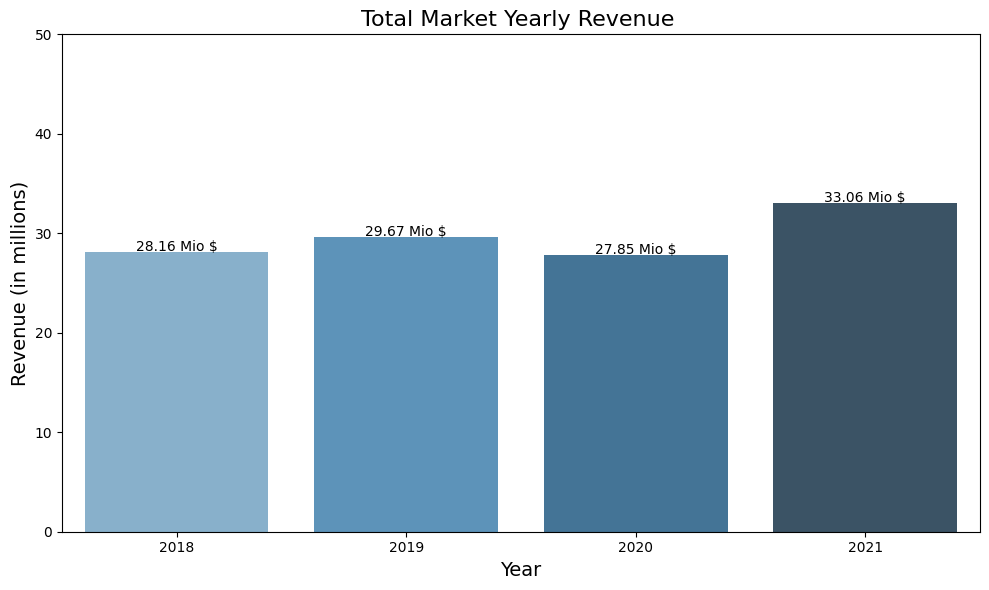

,revenue_vendor,year,sales_yoy_pct
date,,,
2018-12-31,28160654.97,2018,NaN
2019-12-31,29671309.77,2019,5.364416
2020-12-31,27854196.93,2020,-6.124141
2021-12-31,33063058.56,2021,18.700455


In [86]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# desMoines_revenue_yearly = pd.DataFrame(desMoines.resample("YE")["revenue_vendor"].sum())

# If desMoines_revenue_yearly is already a DataFrame:
desMoines_revenue_yearly= pd.DataFrame(desMoines.resample("YE")["revenue_vendor"].sum())
desMoines_revenue_yearly['year'] = desMoines_revenue_yearly.index.year  # Extract the year from the index
desMoines_revenue_yearly["sales_yoy_pct"] = desMoines_revenue_yearly["revenue_vendor"].pct_change() * 100

# Initialize the figure
plt.figure(figsize=(10, 6))

# Create a bar plot using seaborn
sns.barplot(x='year', y=desMoines_revenue_yearly['revenue_vendor'] / 1e6, data=desMoines_revenue_yearly, palette='Blues_d')

# Add a trend line over the bar chart
#sns.lineplot(x='year', y=desMoines_revenue_yearly['revenue_vendor'] / 1e6, data=desMoines_revenue_yearly, marker='o', color='red')

# Add data labels on top of each bar
for index, value in enumerate(desMoines_revenue_yearly['revenue_vendor'] / 1e6):
    plt.text(index, value + 0.1, f'{value:.2f} Mio $', ha='center', fontsize=10)

# Add titles and labels
plt.title('Total Market Yearly Revenue ', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Revenue (in millions)', fontsize=14)
plt.ylim(top=50)
# Adjust layout and show the plot
plt.tight_layout()
plt.show()
desMoines_revenue_yearly


##### Revenue over Time

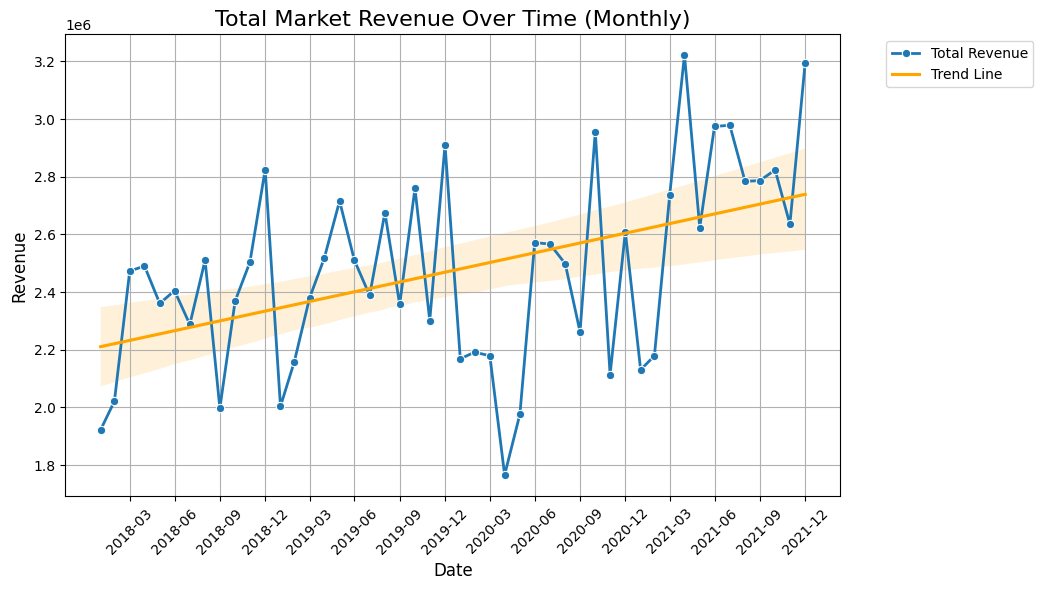

In [87]:
# revenue over time - total + by category

desMoines_revenue_monthly = pd.DataFrame(desMoines.resample("ME")["revenue_vendor"].sum())
#desMoines_revenue_quarterly_by_cat = pd.DataFrame(desMoines.groupby("product_family")["revenue_vendor"].resample("QE").sum())
desMoines_revenue_monthly['date_ordinal'] =desMoines_revenue_monthly.index.map(pd.Timestamp.toordinal)



# Plot total and individual revenues on the same figure
plt.figure(figsize=(10, 6))

# Plot the total revenue
sns.lineplot(data=desMoines_revenue_monthly, x='date_ordinal', y='revenue_vendor', marker='o', label='Total Revenue', linewidth=2)

# Adding a trend line using regplot (with no scatter points)
sns.regplot(x="date_ordinal", y='revenue_vendor', data=desMoines_revenue_monthly, scatter=False, label='Trend Line', color='orange')
# Plot the individual category revenues
#sns.lineplot(data=desMoines_revenue_quarterly_by_cat, x='date', y='revenue_vendor', hue='product_family', marker='o', palette='Set2')

# Customize the plot
plt.title('Total Market Revenue Over Time (Monthly)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue', fontsize=12)

# Define the positions for quarterly x-ticks (March, June, September, December)
quarterly_dates = desMoines_revenue_monthly[desMoines_revenue_monthly.index.month.isin([3, 6, 9, 12])]  # Filter for quarters

# Set x-ticks at quarterly positions and labels
plt.xticks(ticks=quarterly_dates['date_ordinal'], 
           labels=quarterly_dates.index.strftime('%Y-%m'),  # Display as Year-Month
           rotation=45)
plt.xticks(rotation=45)
plt.grid(True)

plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


## Product Categories

##### Summary

In [88]:
# market share by product categories
grouped = desMoines.groupby(["product_family"])[["revenue_vendor","state_bottle_cost","bottles_sold","state_bottle_retail","vendor_name","sale_dollars","item_number","category_name","store_number","volume_sold_liters"]]
product_categories = grouped.agg(tot_revenue_vendors=("revenue_vendor","sum"),tot_order_value_stores= ("sale_dollars","sum"),tot_bottles_sold = ("bottles_sold","sum"),\
                                 num_sub_categories = ("category_name","nunique") \
                                 ,num_vendors =("vendor_name","nunique"),num_stores =("store_number","nunique"), tot_volume_sold_liters=("volume_sold_liters","sum"),\
                                    num_products=("item_number","nunique")
                                    )
#product_categories["price_per_bottle"] = round(product_categories["tot_order_value_stores"] / product_categories["tot_bottles_sold"],2)
product_categories["price_per_litre"] = round(product_categories["tot_revenue_vendors"] / product_categories["tot_volume_sold_liters"],2)
product_categories["market_share"] = product_categories["tot_revenue_vendors"] / product_categories["tot_revenue_vendors"].sum()
#product_categories["min_price_per_litre"] = product_categories.groupby("product_family")["price_per_litre"].min()
#product_categories["max_price_per_litre"] = product_categories.groupby("product_family")["price_per_litre"].max()

#product_categories["margin"] = round(1-(product_categories["tot_revenue_vendors"] / product_categories["tot_order_value_stores"]),2)
grouped_by_year = desMoines.groupby(['product_family', 'year'])['revenue_vendor'].sum().unstack(fill_value=0)
product_categories = product_categories.join(grouped_by_year, on="product_family")
product_categories.sort_values(by=["tot_revenue_vendors", "price_per_litre","tot_bottles_sold"], ascending=[False, False, False])
product_categories["revenue_growth_all_yrs"]  = ((product_categories[2021] / product_categories[2018])-1)
product_categories["cagr"]  = ((product_categories[2021] / product_categories[2018])** (1/3)-1)*100
product_categories["revenue_growth_all_yrs_share"]  = (product_categories[2021] - product_categories[2018]) / (desMoines.groupby("year")["revenue_vendor"].sum().iloc[-1] -desMoines.groupby("year")["revenue_vendor"].sum().iloc[0])
#product_categories["revenue_growth_abs_share"].sort_values(ascending=False)
product_categories




,tot_revenue_vendors,tot_order_value_stores,tot_bottles_sold,num_sub_categories,num_vendors,num_stores,tot_volume_sold_liters,num_products,price_per_litre,market_share,2018,2019,2020,2021,revenue_growth_all_yrs,cagr,revenue_growth_all_yrs_share
product_family,,,,,,,,,,,,,,,,,
brandy,9941636.50,14876127.63,1068388,2,41,99,481123.15,193,20.66,0.083720,2168704.31,2398792.18,2928097.54,2446042.47,0.127882,4.092926,0.056572
gin,2932394.82,4398813.20,372260,5,55,98,270341.58,176,10.85,0.024694,734547.69,786194.58,613399.75,798252.80,0.086727,2.811134,0.012995
liqueur,13165845.76,19721950.34,2421990,5,85,100,963341.80,488,13.67,0.110871,3152388.37,3268771.89,3074997.22,3669688.28,0.164098,5.195336,0.105520
other,8432536.77,12633585.14,1069580,12,134,100,960977.16,1553,8.77,0.071011,1807190.69,2081727.21,2025459.34,2518159.53,0.393411,11.693119,0.145025
rum,8970750.41,13454308.87,1048142,5,68,99,923013.24,371,9.72,0.075544,2330630.69,2360490.86,1930569.28,2349059.58,0.007907,0.262883,0.003759
tequila,14360141.22,21508762.50,1084265,3,58,99,866413.05,369,16.57,0.120928,2921538.67,3189607.41,3419263.76,4829731.38,0.653146,18.241640,0.389236
vodka,29094163.42,43691753.18,4183288,4,83,100,3294948.63,773,8.83,0.245005,7556559.61,7538690.63,6535085.61,7463827.57,-0.012272,-0.410742,-0.018916
whisky,31851751.33,47737576.99,2606115,14,142,100,2020430.73,1416,15.76,0.268227,7489094.94,8047035.01,7327324.43,8988296.95,0.200185,6.271308,0.305810


##### Growth YoY & CAGR

In [89]:
#growth rate by product categories

grouped_year = desMoines.groupby(["year","product_family"])[["revenue_vendor","state_bottle_cost","item_number","bottles_sold","state_bottle_retail","vendor_name","sale_dollars","category_name","store_number","volume_sold_liters"]]
#_df = desMoines.loc[:,["date","product_family","revenue_vendor","state_bottle_cost","bottles_sold","state_bottle_retail","vendor_name","sale_dollars","category_name","store_number","volume_sold_liters"]]
trend = grouped_year.agg(tot_revenue_vendors=("revenue_vendor","sum"),tot_order_value_stores= ("sale_dollars","sum"),\
                            tot_bottles_sold = ("bottles_sold","sum"),\
                            num_sub_categories = ("category_name","nunique"), \
                            num_vendors =("vendor_name","nunique"),num_stores =("store_number","nunique"),\
                            tot_volume_sold_liters=("volume_sold_liters","sum"),\
                            num_products=("item_number","nunique")
                            )
trend["price_per_litre"] = round(trend["tot_order_value_stores"] / trend["tot_volume_sold_liters"],2)
#trend['market_share'] = trend.groupby('year')['tot_revenue_vendors'].sum()

trend.reset_index().sort_values(by=["product_family", "year"])##.loc[:,["year","product_family","market_share","tot_revenue_vendors"]]


#desMoines.loc[:,["item_number","item_description","vendor_name","vendor_number"]].drop_duplicates().sort_values(by=["item_description"])
#sorted_by_year = desMoines.sort_values(by="year")
#desMoines["year"]
trend["sales_yoy_pct"] = trend.groupby("product_family")["tot_revenue_vendors"].pct_change() * 100
trend["num_products_yoy_abs"] = trend.groupby("product_family")["num_products"].diff()
trend["num_vendors_yoy_abs"] = trend.groupby("product_family")["num_vendors"].diff()
trend["price_per_litre_yoy_pct"] = trend.groupby("product_family")["price_per_litre"].pct_change() * 100
trend['market_share'] = trend['tot_revenue_vendors'] / trend.groupby('year')['tot_revenue_vendors'].sum()
trend['market_share_yoy_pct'] = trend.groupby("product_family")["market_share"].pct_change() * 100

trend.loc[:,["tot_revenue_vendors","sales_yoy_pct","price_per_litre","num_products_yoy_abs","num_vendors_yoy_abs","price_per_litre_yoy_pct","market_share","market_share_yoy_pct"]]


tot_revenue_vendors  sales_yoy_pct  price_per_litre  \
year product_family                                                        
2018 brandy                   2168704.31            NaN            28.99   
     gin                       734547.69            NaN            15.33   
     liqueur                  3152388.37            NaN            18.96   
     other                    1807190.69            NaN            12.68   
     rum                      2330630.69            NaN            14.26   
     tequila                  2921538.67            NaN            22.58   
     vodka                    7556559.61            NaN            13.35   
     whisky                   7489094.94            NaN            22.24   
2019 brandy                   2398792.18      10.609462            29.34   
     gin                       786194.58       7.031115            15.67   
     liqueur                  3268771.89       3.691916            19.51   
     other                    2081727.21      15.191342            13.24   
     rum                      2360490.86       1.281206            14.33   
     tequila                  3189607.41       9.175601            23.46   
     vodka                    7538690.63      -0.236470            13.12   
     whisky                   8047035.01       7.450033            23.12   
2020 brandy                   2928097.54      22.065495            32.37   
     gin                       613399.75     -21.978634            16.45   
     liqueur                  3074997.22      -5.928057            21.48   
     other                    2025459.34      -2.702942            13.27   
     rum                      1930569.28     -18.213228            14.78   
     tequila                  3419263.76       7.200145            25.40   
     vodka                    6535085.61     -13.312723            12.97   
     whisky                   7327324.43      -8.943798            23.66   
2021 brandy                   2446042.47     -16.463081            32.83   
     gin                       798252.80      30.135821            17.80   
     liqueur                  3669688.28      19.339564            22.09   
     other                    2518159.53      24.325356            13.32   
     rum                      2349059.58      21.677041            15.00   
     tequila                  4829731.38      41.250623            27.05   
     vodka                    7463827.57      14.211627            13.57   
     whisky                   8988296.95      22.668200            25.43   

                     num_products_yoy_abs  num_vendors_yoy_abs  \
year product_family                                              
2018 brandy                           NaN                  NaN   
     gin                              NaN                  NaN   
     liqueur                          NaN                  NaN   
     other                            NaN                  NaN   
     rum                              NaN                  NaN   
     tequila                          NaN                  NaN   
     vodka                            NaN                  NaN   
     whisky                           NaN                  NaN   
2019 brandy                          -8.0                  7.0   
     gin                             18.0                  5.0   
     liqueur                        -29.0                  0.0   
     other                          -43.0                 -5.0   
     rum                             -1.0                  8.0   
     tequila                         19.0                  9.0   
     vodka                           -3.0                  8.0   
     whisky                          48.0                  4.0   
2020 brandy                           1.0                  4.0   
     gin                              4.0                  3.0   
     liqueur                          4.0                 -4.0   
     other                           38.0         

/var/folders/np/x7dj_x5x1yx89qsg0fp5bq8c0000gr/T/ipykernel_16518/1476426664.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cagr  = yoy_growth_by_cat.groupby('product_family').apply(calculate_cagr).reset_index(name='CAGR').set_index("product_family")
/var/folders/np/x7dj_x5x1yx89qsg0fp5bq8c0000gr/T/ipykernel_16518/1476426664.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_data, x='year', y='tot_revenue_vendors', ax=axes[i, 0], palette='viridis')
/var/folders/np/x7dj_x5x1yx89qsg0fp5bq8c0000gr/T/ipykernel_16518/1476426664.py:54: Fu

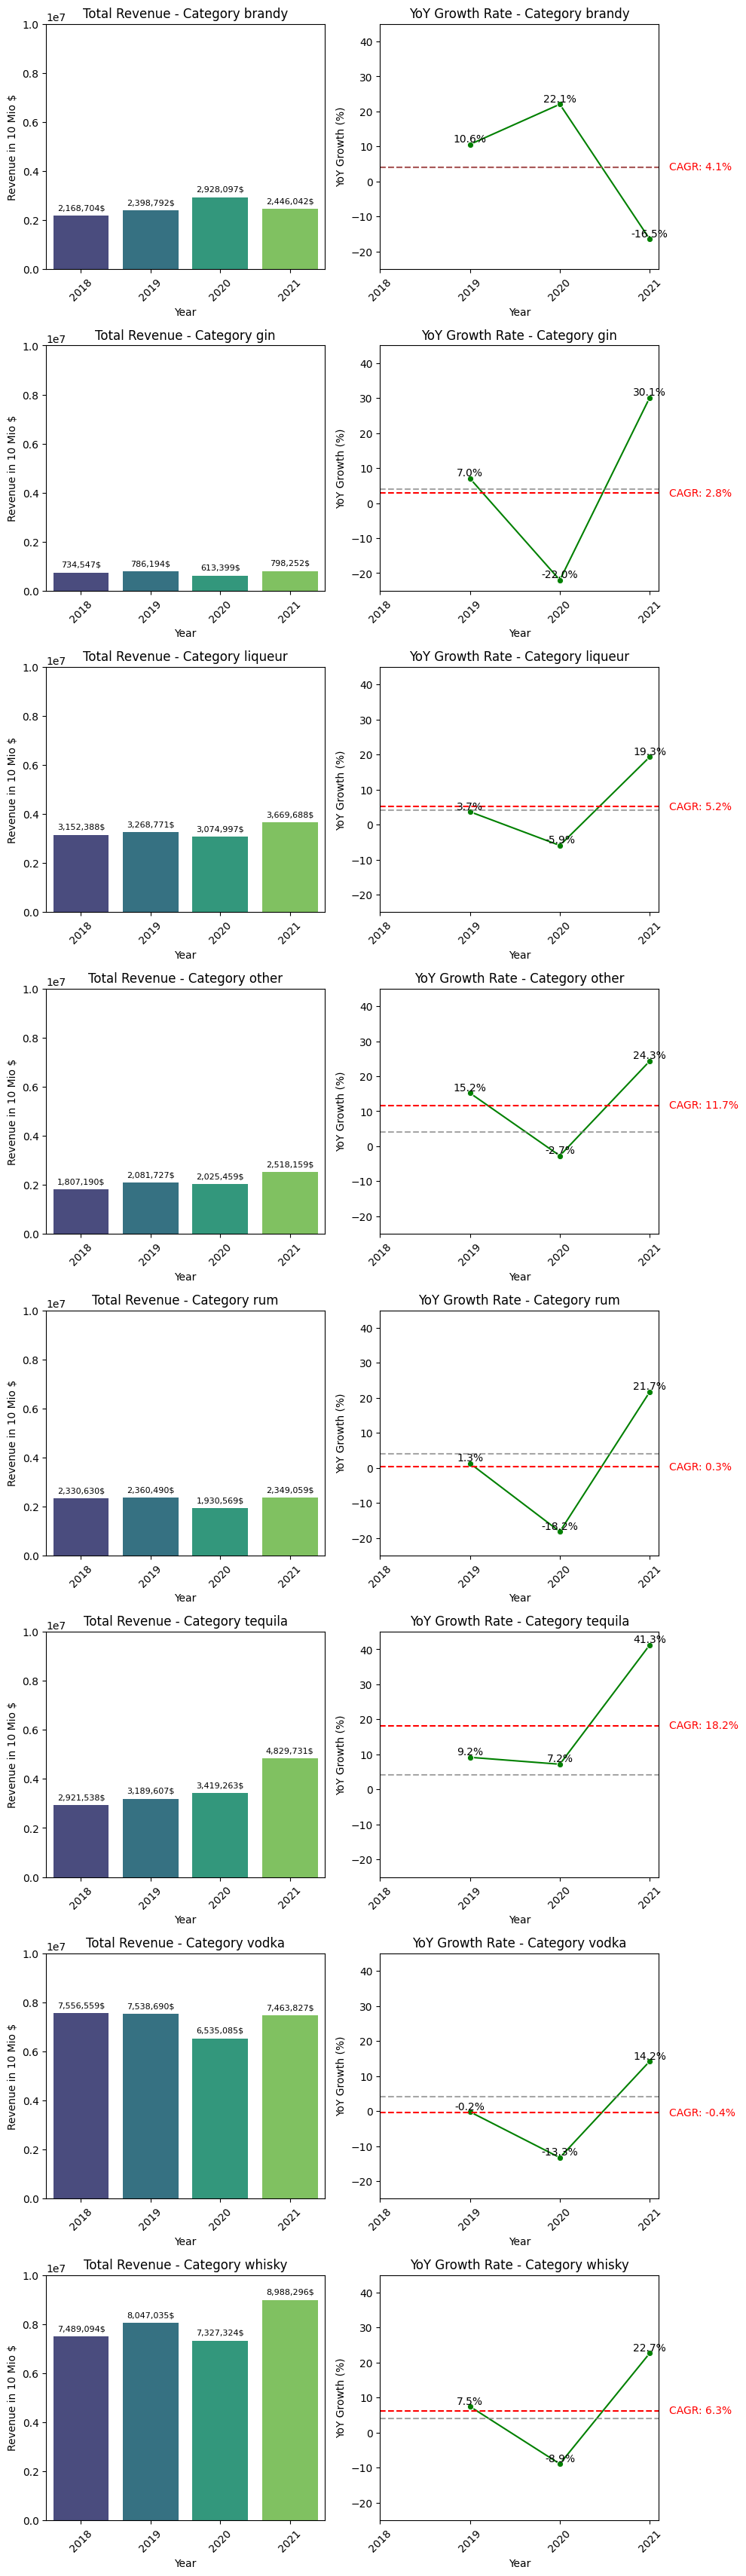

In [90]:
# revenue growth by product category
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Filter out the first year (since YoY cannot be calculated for it)
yoy_growth_by_cat = trend.copy().reset_index()
yoy_growth_by_cat['year'] = yoy_growth_by_cat['year'].astype('category')


# Group by category and calculate the CAGR
def calculate_cagr(group):
    start_value = group['tot_revenue_vendors'].iloc[0]  # Starting revenue
    end_value = group['tot_revenue_vendors'].iloc[-1]   # Ending revenue
    periods = group['year'].iloc[-1] - group['year'].iloc[0]  # Number of periods (years)
    
    cagr = ((end_value / start_value) ** (1 / periods) - 1)*100

    return cagr

# Apply the CAGRs calculation for each category
cagr  = yoy_growth_by_cat.groupby('product_family').apply(calculate_cagr).reset_index(name='CAGR').set_index("product_family")

# Apply the CAGRs calculation for total market
start_value = trend.groupby("year")['tot_revenue_vendors'].sum().loc[2018] # Starting revenue
end_value = trend.groupby("year")['tot_revenue_vendors'].sum().loc[2021]   # Ending revenue
periods = 4  # Number of periods (years)
    
cagr_all = ((end_value / start_value) ** (1 / periods) - 1)*100

# Get unique product categories
categories = yoy_growth_by_cat['product_family'].unique()

# Create a subplot grid: one row for each product category with two columns
fig, axes = plt.subplots(nrows=len(categories), ncols=2, figsize=(10, 6 * len(categories)/1.4))

# If there's only one category, make axes iterable
if len(categories) == 1:
    axes = [axes]

# Plot for each category
for i, category in enumerate(categories):
    cat_data = yoy_growth_by_cat[yoy_growth_by_cat['product_family'] == category]
    
    # Calculate CAGR for the product category
    start_revenue = cat_data['tot_revenue_vendors'].iloc[0]
    end_revenue = cat_data['tot_revenue_vendors'].iloc[-1]
    periods = len(cat_data['year']) - 1
    #cagr = calculate_cagr(start_revenue, end_revenue, periods) * 100  # Convert to percentage

    # Bar plot for Revenue (first column)
    sns.barplot(data=cat_data, x='year', y='tot_revenue_vendors', ax=axes[i, 0], palette='viridis')
    axes[i, 0].set_title(f'Total Revenue - Category {category}')
    axes[i, 0].set_ylabel('Revenue in 10 Mio $')
    axes[i, 0].set_xlabel('Year')
    axes[i, 0].tick_params(axis='x', rotation=45)
    axes[i, 0].set_ylim(0, 10000000)

    # Line plot for YoY Growth (second column)
    sns.lineplot(data=cat_data, x='year', y='sales_yoy_pct', ax=axes[i, 1], marker='o', color='g')
    axes[i, 1].set_title(f'YoY Growth Rate - Category {category}')
    axes[i, 1].set_ylabel('YoY Growth (%)')
    axes[i, 1].set_xlabel('Year')
    axes[i, 1].set_ylim(-25, 45)
    # Add compact data labels to the bar plot
    for p in axes[i, 0].patches:
        height = p.get_height()
        # Add label just above the bar with some small offset (e.g., 2% of height)
        axes[i, 0].annotate(f'{int(height):,}$',  # Format the number with commas
                            (p.get_x() + p.get_width() / 2., height),
                            ha='center', va='bottom', 
                            xytext=(0, 4),  # Offset slightly above the bar
                            textcoords='offset points', 
                            fontsize=8, color='black')  # Adjust font size for compactness

    # Plot the CAGR as a horizontal line (constant CAGR across all years)
    axes[i, 1].axhline(y=float(cagr.loc[category].values[0]), color='r', linestyle='--', label=f'CAGR ({float(cagr.loc[category].values[0]):.1f}%)')
    # Plot the overall CAGR as a light grey dashed line
    axes[i, 1].axhline(y=cagr_all, color='grey', linestyle='--', alpha=0.7, label=f'Overall CAGR ({cagr_all:.1f}%)')

  # Annotate the category-specific CAGR line
    xlim = axes[i, 1].get_xlim()
    ylim = axes[i, 1].get_ylim()  # Get the y-axis limits for better alignment

    # Position both labels at the same vertical height, near the top of the y-axis
    label_y_position = ylim[1] - 5  # Slightly below the top to prevent overlap with the plot boundary

       # Annotate the CAGR line on the right-hand side, slightly outside the plot
    xlim = axes[i, 1].get_xlim()  # Get the x-axis limits
    axes[i, 1].annotate(f'CAGR: {float(cagr.loc[category].values[0]):.1f}%', 
                        xy=(xlim[1], float(cagr.loc[category].values[0])),  # Position it at the right end of the plot
                        xytext=(10, 0),  # Offset the text slightly to the right
                        textcoords='offset points', 
                        ha='left', va='center', 
                        fontsize=10, color='r', 
                        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

   # Annotate the overall CAGR, aligned vertically with the category-specific label
    """axes[i, 1].annotate(f'Overall CAGR: {cagr_all:.1f}%', 
                        xy=(xlim[1], label_y_position -5),  # Just below the category-specific label
                        xytext=(10, 0), 
                        textcoords='offset points', 
                        ha='left', va='center', 
                        fontsize=10, color='grey', 
                        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))"""

    # Add data labels to the line plot
    for j in range(len(cat_data)):
        axes[i, 1].text(cat_data['year'].iloc[j], cat_data['sales_yoy_pct'].iloc[j],
                        f'{cat_data["sales_yoy_pct"].iloc[j]:.1f}%',  # Format to 1 decimal place
                        ha='center', va='bottom')  # Positioning

    # Set x-ticks to be only the years
    axes[i, 1].set_xticks(cat_data['year'])  # Set the ticks to the actual year values
    axes[i, 1].set_xticklabels(cat_data['year'].astype(str))  # Set tick labels as strings for proper formatting

    # Rotate x-axis labels for better readability
    axes[i, 1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
# Show the plot
plt.show()


In [91]:
yoy_growth_by_cat

# Group by category and calculate the CAGR
def calculate_cagr(group):
    start_value = group['tot_revenue_vendors'].iloc[0]  # Starting revenue
    end_value = group['tot_revenue_vendors'].iloc[-1]   # Ending revenue
    periods = group['year'].iloc[-1] - group['year'].iloc[0]  # Number of periods (years)
    
    cagr = (end_value / start_value) ** (1 / periods) - 1

    return cagr

# Apply the CAGRs calculation for each category
cagr  = yoy_growth_by_cat.groupby('product_family').apply(calculate_cagr).reset_index(name='CAGR').set_index("product_family")

#print(tot_revenue_vendors)

float(cagr.loc["brandy"].values[0])

/var/folders/np/x7dj_x5x1yx89qsg0fp5bq8c0000gr/T/ipykernel_16518/1034085697.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cagr  = yoy_growth_by_cat.groupby('product_family').apply(calculate_cagr).reset_index(name='CAGR').set_index("product_family")


0.04092926097149174

##### Market Share

product_family    brandy       gin   liqueur     other       rum   tequila  \
year                                                                         
2018            0.077012  0.026084  0.111943  0.064174  0.082762  0.103745   
2019            0.080846  0.026497  0.110166  0.070160  0.079555  0.107498   
2020            0.105122  0.022022  0.110396  0.072716  0.069310  0.122756   
2021            0.073981  0.024143  0.110991  0.076162  0.071048  0.146076   

product_family     vodka    whisky  
year                                
2018            0.268337  0.265942  
2019            0.254073  0.271206  
2020            0.234618  0.263060  
2021            0.225745  0.271853  


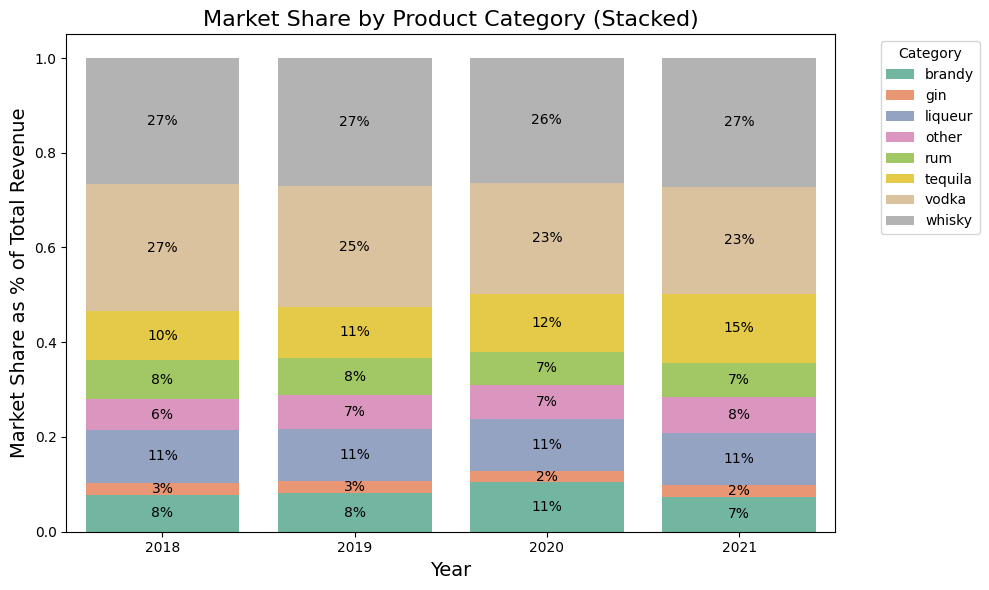

In [92]:
#market share by product categories over time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure pivoted DataFrame is correct
#trend.reset_index(inplace=True)
pivot_df = trend.reset_index().pivot(index='year', columns='product_family', values='market_share')

print(pivot_df)

# Plotting using seaborn with a stacked bar approach
fig, ax = plt.subplots(figsize=(10, 6))

# Define color palette
colors = sns.color_palette('Set2', n_colors=len(pivot_df.columns))

# Plot each category in the stacked bar chart
bottom = pd.Series([0] * len(pivot_df), index=pivot_df.index)  # To track the bottom position of the stacks

# Loop through each category to stack the bars and add percentage labels
for idx, category in enumerate(pivot_df.columns):
    sns.barplot(x=pivot_df.index, y=pivot_df[category], color=colors[idx], ax=ax, 
                label=category, bottom=bottom)
    
    # Add percentage labels
    for i, year in enumerate(pivot_df.index):
        height = pivot_df[category].loc[year]
        if height > 0:  # Only show the percentage for non-zero values
            ax.text(i, bottom[year] + height / 2, f'{height:.0%}', ha='center', va='center', color='black', fontsize=10)
    
    bottom += pivot_df[category]  # Update the bottom position for the next category

# Add labels and title
ax.set_title('Market Share by Product Category (Stacked)', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Market Share as % of Total Revenue', fontsize=14)

# Move legend to the right of the plot (outside)
ax.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout so there's space for the legend
plt.tight_layout()

# Show the plot
plt.show()


##### Prices

/var/folders/np/x7dj_x5x1yx89qsg0fp5bq8c0000gr/T/ipykernel_16518/69567062.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  median_price_per_category = desMoines.groupby("product_family").apply(lambda x: (x['revenue_vendor'] / x['volume_sold_liters']).median()).reset_index()
/var/folders/np/x7dj_x5x1yx89qsg0fp5bq8c0000gr/T/ipykernel_16518/69567062.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=desMoines['revenue_vendor'] / desMoines["volume_sold_liters"],
/var/folders/np/x7dj_x5x1yx89qsg0fp5bq8c0000gr/T/ipykernel_16518/69567062.py:47: Us

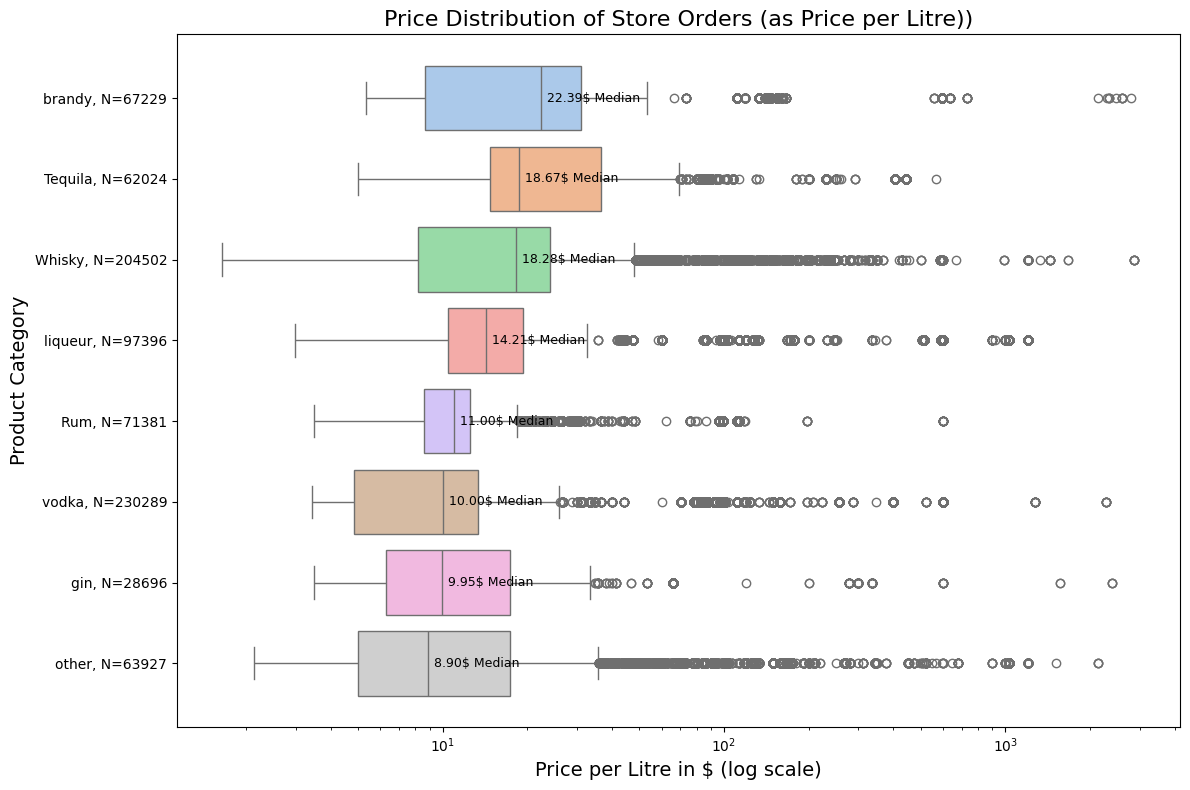

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate prices and product family sizes
prices = desMoines.groupby("product_family")[["revenue_vendor", "volume_sold_liters"]].agg("sum")
prices["price_per_litre"] = prices["revenue_vendor"] / prices["volume_sold_liters"]

# Calculate the median price per litre for sorting
median_price_per_category = desMoines.groupby("product_family").apply(lambda x: (x['revenue_vendor'] / x['volume_sold_liters']).median()).reset_index()
median_price_per_category.columns = ['product_family', 'median_price_per_litre']

# Merge median price with the existing data
prices = prices.merge(median_price_per_category, on="product_family")

# Sort by median price per litre
prices_sorted = prices.sort_values(by="median_price_per_litre", ascending=False)

# Calculate the number of items per product family (for labeling like "N=2004")
sizes = desMoines.groupby("product_family").size()

# Define the categories to be bolded
highlighted_categories = ['tequila', 'rum', 'whisky']

# Create the figure and axis
plt.figure(figsize=(12, 8))

# Create the boxplot in horizontal orientation, sorted by median price per litre
sns.boxplot(x=desMoines['revenue_vendor'] / desMoines["volume_sold_liters"], 
            y=desMoines['product_family'], 
            order=prices_sorted['product_family'],
            orient='h', palette='pastel')

# Apply log scale to the x-axis (since prices are on the x-axis now)
plt.xscale('log')

# Modify the y-axis labels to include the sample size N next to the product family label
# and apply bold formatting to tequila, rum, and whisky
y_labels = []
for category in prices_sorted['product_family']:
    label = f'{category}, N={sizes[category]}'
    if category in highlighted_categories:
        label = f'{category.capitalize()}, N={sizes[category]}'  # Bold for highlighted categories
    y_labels.append(label)

# Set the y-axis labels (fontdict here can adjust font size or style if needed)
plt.gca().set_yticklabels(y_labels, fontdict={'fontsize': 10})

# Add data labels for the median values on the boxplot
for i, category in enumerate(prices_sorted['product_family']):
    median_value = prices_sorted.loc[prices_sorted['product_family'] == category, 'median_price_per_litre'].values[0]

    # Annotate the median value on the plot
    plt.scatter(median_value, i, color='red', s=80, marker='D', label='Median' if i == 0 else "")  # Show label only once

    # Add a text annotation for the median value
    plt.text(median_value * 1.05, i, f'{median_value:.2f}$ Median', va='center', fontsize=9, color='black')

# Add titles and labels
plt.title('Price Distribution of Store Orders (as Price per Litre))', fontsize=16)
plt.xlabel('Price per Litre in $ (log scale)', fontsize=14)
plt.ylabel('Product Category', fontsize=14)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [94]:
import pandas as pd

# Calculate the price per liter for each order
desMoines['price_per_liter'] = desMoines['revenue_vendor'] / desMoines['volume_sold_liters']

# Calculate the weighted average price per category (weighted by volume sold)
weighted_avg_price_per_category = desMoines.groupby('product_family').apply(
    lambda x: (x['price_per_liter'] * x['volume_sold_liters']).sum() / x['volume_sold_liters'].sum()
).reset_index()

# Rename columns
weighted_avg_price_per_category.columns = ['product_family', 'weighted_avg_price_per_liter']

# Display the result
print(weighted_avg_price_per_category)


  product_family  weighted_avg_price_per_liter
0         brandy                     20.663393
1            gin                     10.846999
2        liqueur                     13.666848
3          other                      8.774961
4            rum                      9.718983
5        tequila                     16.574244
6          vodka                      8.829929
7         whisky                     15.764832


/var/folders/np/x7dj_x5x1yx89qsg0fp5bq8c0000gr/T/ipykernel_16518/1324043931.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_price_per_category = desMoines.groupby('product_family').apply(


/var/folders/np/x7dj_x5x1yx89qsg0fp5bq8c0000gr/T/ipykernel_16518/1370423374.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  price_stats = desMoines.groupby('product_family').apply(


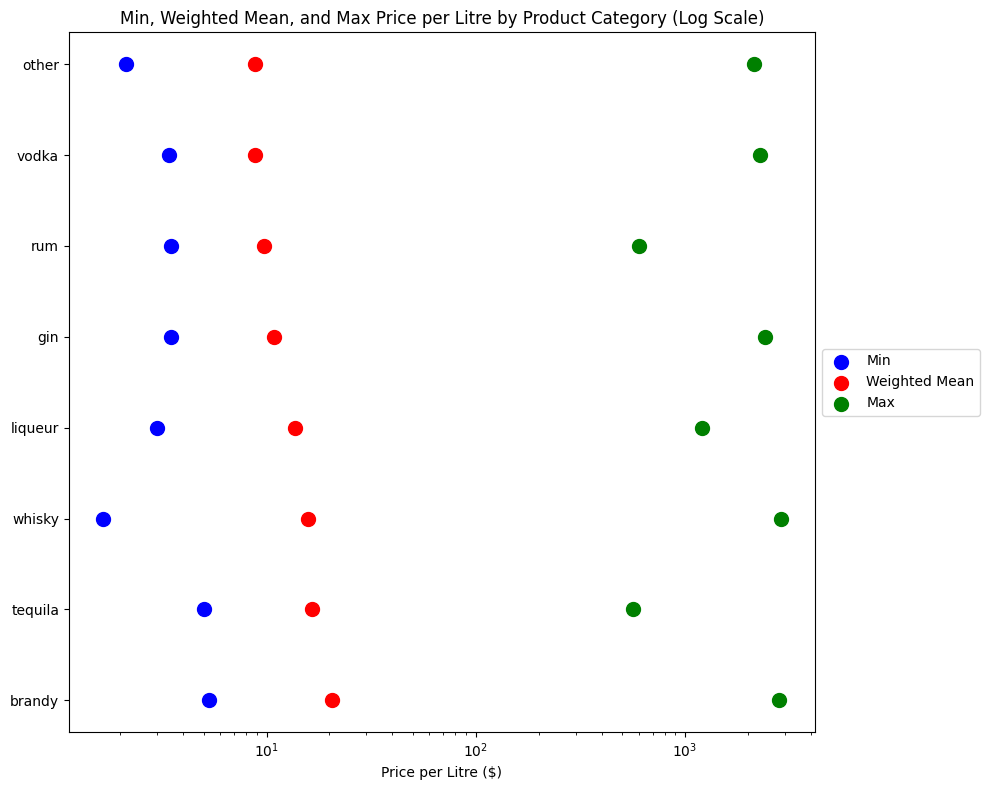

,product_family,min,max,weighted_mean
0,brandy,5.333333,2798.586667,20.663393
5,tequila,5.000000,566.666667,16.574244
7,whisky,1.650000,2876.400000,15.764832
2,liqueur,2.990000,1200.000000,13.666848
1,gin,3.500000,2400.000000,10.846999
4,rum,3.500000,600.000000,9.718983
6,vodka,3.428571,2284.800000,8.829929
3,other,2.130000,2132.253333,8.774961


In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate price per liter for each order
desMoines['price_per_liter'] = desMoines['revenue_vendor'] / desMoines['volume_sold_liters']

# Function to calculate weighted mean
def weighted_mean(data, value_col, weight_col):
    return (data[value_col] * data[weight_col]).sum() / data[weight_col].sum()

# Group by product category and calculate min, max, and weighted mean
price_stats = desMoines.groupby('product_family').apply(
    lambda x: pd.Series({
        'min': x['price_per_liter'].min(),
        'max': x['price_per_liter'].max(),
        'weighted_mean': weighted_mean(x, 'price_per_liter', 'volume_sold_liters')
    })
).reset_index()

# sort the data by weighted mean
price_stats = price_stats.sort_values(by='weighted_mean', ascending=False)

# Create the dumbbell plot without the grey line and without data labels

# Initialize the figure
plt.figure(figsize=(10, 8))

# Plot points for the min, weighted mean, and max without grey lines and without data labels
plt.scatter(price_stats['min'], range(price_stats.shape[0]), color='blue', label='Min', s=100, zorder=3)
plt.scatter(price_stats['weighted_mean'], range(price_stats.shape[0]), color='red', label='Weighted Mean', s=100, zorder=3)
plt.scatter(price_stats['max'], range(price_stats.shape[0]), color='green', label='Max', s=100, zorder=3)

# Ensure proper alignment of category names (y-axis)
plt.yticks(range(price_stats.shape[0]), price_stats['product_family'])

# Add a log scale to the x-axis
plt.xscale('log')

# Add labels and title
plt.xlabel('Price per Litre ($)')
plt.title('Min, Weighted Mean, and Max Price per Litre by Product Category (Log Scale)')

# Move the legend outside to the right of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.tight_layout()
plt.show()
price_stats

#### Matrix Market Growth x Market Share 

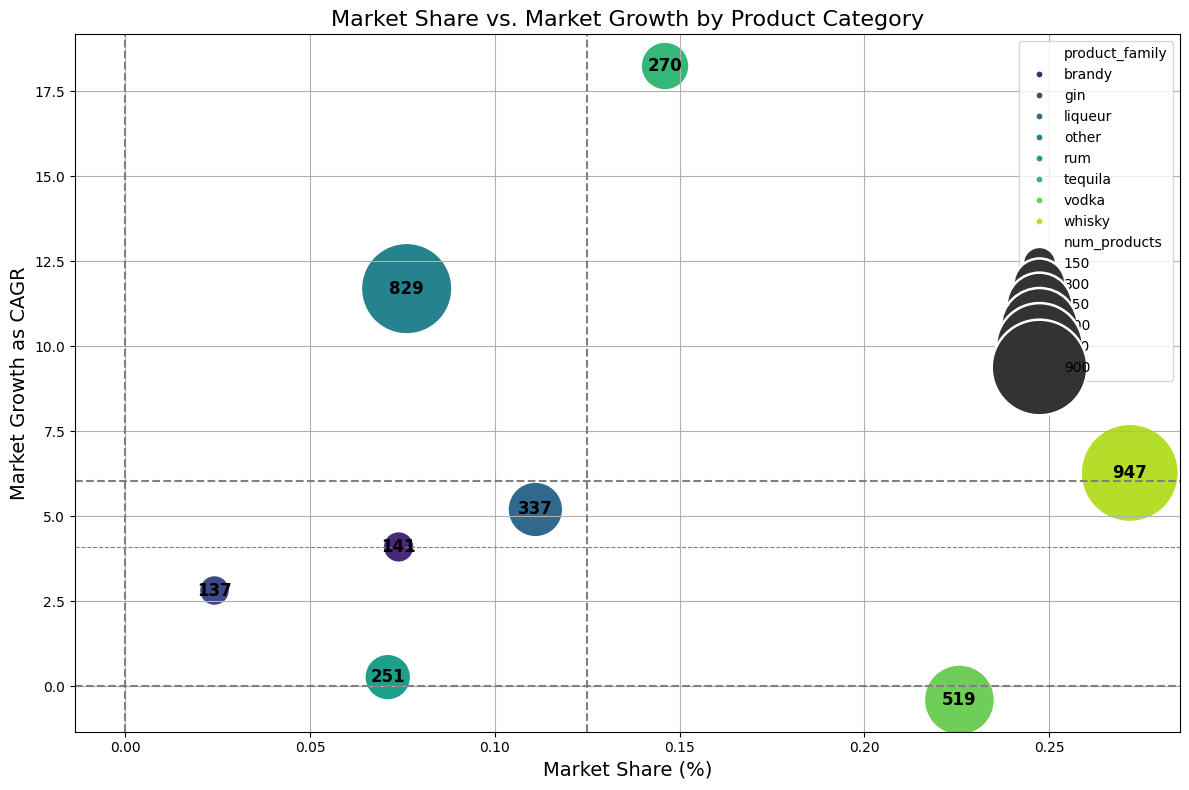

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

matrix = trend.groupby("product_family")[["market_share","tot_revenue_vendors","num_products"]].agg(market_share_2021=("market_share","last"),revenue_2021=("tot_revenue_vendors","last"),revenue_2018=("tot_revenue_vendors","first")\
                                                                                                    ,num_products=("num_products","last"))
#groupby("product_family")
matrix["market_growth"] = ((matrix["revenue_2021"]/matrix["revenue_2018"])**(1/3)-1)*100
matrix = matrix.loc[:,["market_share_2021","market_growth","num_products"]]
# Group by category and calculate the CAGR
def calculate_cagr(group):
    start_value = group['tot_revenue_vendors'].iloc[0]  # Starting revenue
    end_value = group['tot_revenue_vendors'].iloc[-1]   # Ending revenue
    periods = group['year'].iloc[-1] - group['year'].iloc[0]  # Number of periods (years)
    
    cagr = ((end_value / start_value) ** (1 / periods) - 1)*100

    return cagr

# Apply the CAGRs calculation for each category
start_value = trend.groupby("year")['tot_revenue_vendors'].sum().loc[2018] # Starting revenue
end_value = trend.groupby("year")['tot_revenue_vendors'].sum().loc[2021]   # Ending revenue
periods = 4  # Number of periods (years)
    
cagr_all = ((end_value / start_value) ** (1 / periods) - 1)*100
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the scatter plot
scatter = sns.scatterplot(data=matrix, 
                          x='market_share_2021', 
                          y='market_growth', 
                          size='num_products', 
                          sizes=(500, 5000),  # Increase bubble size range for better visibility
                          hue='product_family', 
                          palette='viridis', 
                          legend=True)

# Draw lines at x=0 and y=0
plt.axhline(0, color='grey', linestyle='--', linewidth=1.5)  # Horizontal line at y=0
plt.axvline(0, color='grey', linestyle='--', linewidth=1.5)  # Vertical line at x=0
plt.axvline(matrix["market_share_2021"].mean(), color='grey', linestyle='--', linewidth=1.5) 
plt.axhline(cagr_all, color='grey', linestyle='--', linewidth=0.8) 
plt.axhline(matrix["market_growth"].mean(), color='grey', linestyle='--', linewidth=1.5) 

# Add titles and labels
plt.title('Market Share vs. Market Growth by Product Category', fontsize=16)
plt.xlabel('Market Share (%)', fontsize=14)
plt.ylabel('Market Growth as CAGR', fontsize=14)

# Annotate each bubble with the number of products
for i in range(len(matrix.index)):
    plt.annotate(f'{matrix["num_products"].iloc[i]}',  # Label with num_products
                 (matrix['market_share_2021'].iloc[i], matrix['market_growth'].iloc[i]), 
                 fontsize=12, 
                 ha='center', 
                 va='center', 
                 color='black', 
                 weight='bold')

# Show the plot
plt.grid()
plt.tight_layout()
plt.show()


## Product Brands

##### All

In [97]:
# product / sub-category analysis
grouped_year = desMoines.groupby(["product_family","category_name","item_description"])[["revenue_vendor","state_bottle_cost","item_number","bottles_sold","state_bottle_retail","vendor_name","sale_dollars","category_name","store_number","volume_sold_liters"]]
sub_category_timeseries = grouped_year.agg(tot_revenue_vendors=("revenue_vendor","sum"),
                                           tot_order_value_stores= ("sale_dollars","sum"),
                                           tot_bottles_sold = ("bottles_sold","sum"),\
                                            num_sub_categories = ("category_name","nunique"), 
                                            num_vendors =("vendor_name","nunique"),num_stores =("store_number","nunique"),
                                            tot_volume_sold_liters=("volume_sold_liters","sum"),
                                            num_products=("item_number","nunique"),
                                            num_orders=("item_number","count")
                            )
# add price per liter
sub_category_timeseries["price_per_litre"] = round(sub_category_timeseries["tot_order_value_stores"] / sub_category_timeseries["tot_volume_sold_liters"],2)

# add revenue for each year
grouped_by_year = desMoines.groupby(["product_family","category_name","item_description","year"])['revenue_vendor'].sum().unstack(fill_value=0)
sub_category_timeseries = sub_category_timeseries.join(grouped_by_year, on=["product_family","category_name","item_description"])

# add revenue share of parent category
sub_category_timeseries["revenue_share"] = sub_category_timeseries["tot_revenue_vendors"] / sub_category_timeseries.groupby("product_family")["tot_revenue_vendors"].sum()


sub_category_timeseries


tot_revenue_vendors  \
product_family category_name      item_description                                                    
brandy         AMERICAN BRANDIES  ARROW APRICOT BRANDY                                      1980.54   
                                  ARROW APRICOT FLAV BRANDY                                  872.34   
                                  ARROW BLACKBERRY BRANDY                                   3682.34   
                                  ARROW BLACKBERRY FLAV BRANDY                              2853.52   
                                  ARROW WILD CHERRY BRANDY                                   151.12   
...                                                                                             ...   
whisky         TENNESSEE WHISKIES SOOH AMERICAN BORN ORIGINAL MOONSHINE                      345.00   
                                  SOOH JACK DANIELS SINGLE BARREL BARREL PROOF              2923.20   
                                  SOOH OLE SMOKY PEACH WHISKEY                               540.00   
                                  UNCLE NEAREST 1856 AGED WHISKEY                           9580.19   
                                  UNCLE NEAREST 1884 SMALL BATCH WHISKEY                    4341.06   

                                                                                tot_order_value_stores  \
product_family category_name      item_description                                                       
brandy         AMERICAN BRANDIES  ARROW APRICOT BRANDY                                         2969.73   
                                  ARROW APRICOT FLAV BRANDY                                    1308.51   
                                  ARROW BLACKBERRY BRANDY                                      5523.15   
                                  ARROW BLACKBERRY FLAV BRANDY                                 4280.28   
                                  ARROW WILD CHERRY BRANDY                                      226.68   
...                                                                                                ...   
whisky         TENNESSEE WHISKIES SOOH AMERICAN BORN ORIGINAL MOONSHINE                         517.50   
                                  SOOH JACK DANIELS SINGLE BARREL BARREL PROOF                 4384.80   
                                  SOOH OLE SMOKY PEACH WHISKEY                                  810.00   
                                  UNCLE NEAREST 1856 AGED WHISKEY                             14372.96   
                                  UNCLE NEAREST 1884 SMALL BATCH WHISKEY                       6572.13   

                                                                                tot_bottles_sold  \
product_family category_name      item_description                                                 
brandy         AMERICAN BRANDIES  ARROW APRICOT BRANDY                                       319   
                                  ARROW APRICOT FLAV BRANDY                                  143   
                                  ARROW BLACKBERRY BRANDY                                    591   
                                  ARROW BLACKBERRY FLAV BRANDY                               454   
                                  ARROW WILD CHERRY BRANDY                                    28   
...                                                                                          ...   
whisky         TENNESSEE WHISKIES SOOH AMERICAN BORN ORIGINAL MOONSHINE                       30   
                                  SOOH JACK DANIELS SINGLE BARREL BARREL PROOF                90   
                                  SOOH OLE SMOKY PEACH WHISKEY                                54   
                                  UNCLE NEAREST 1856 AGED WHISKEY                            325   
                                  UNCLE NEAREST 1884 SMALL BATCH WHISKEY                     163   

                                                            

##### Tequila

/var/folders/np/x7dj_x5x1yx89qsg0fp5bq8c0000gr/T/ipykernel_16518/1779455832.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tequila["price_percentile"] = tequila["price_per_litre"].apply(lambda price: calculate_percentile(price, tequila_price_range))
/var/folders/np/x7dj_x5x1yx89qsg0fp5bq8c0000gr/T/ipykernel_16518/1779455832.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tequila["bin"] = bins
/var/folders/np/x7dj_x5x1yx89qsg0fp5bq8c0000gr/T/ipykernel_16518/1779455832.py:23: FutureWarning: The def

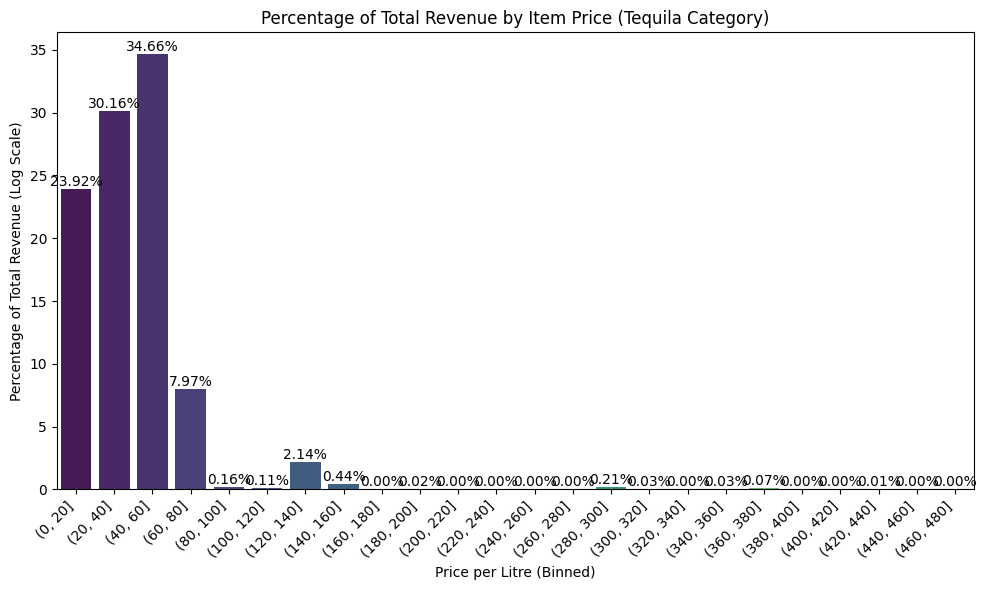

,price_per_litre,percentage_of_total
0,"(0, 20]",23.915915
1,"(20, 40]",30.163083
2,"(40, 60]",34.661969
3,"(60, 80]",7.971515
4,"(80, 100]",0.160173
5,"(100, 120]",0.112349
6,"(120, 140]",2.141249
7,"(140, 160]",0.444358
8,"(160, 180]",0.000000
9,"(180, 200]",0.019077


In [98]:
# tequila 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

tequila = sub_category_timeseries.xs('tequila', level='product_family')
tequila_price_range = tequila["price_per_litre"].values

# Calculate the percentile rank manually using numpy

def calculate_percentile(price, price_range):
    return np.sum(price_range <= price) / len(price_range) 

tequila["price_percentile"] = tequila["price_per_litre"].apply(lambda price: calculate_percentile(price, tequila_price_range))

bin_edges = list(range(0, 500, 20))
# Reduce the number of bins to limit the number of bars in the plot
bins = pd.cut(tequila["price_per_litre"], bins=bin_edges)  # Fewer bins to reduce the number of bars
tequila["bin"] = bins

# Aggregate the total revenue by these price bins
revenue_distribution = tequila.groupby(bins)["tot_revenue_vendors"].sum().reset_index()

# Calculate the total revenue for the entire category
total_revenue = tequila["tot_revenue_vendors"].sum()

# Calculate the percentage of total revenue for each price bin
revenue_distribution["percentage_of_total"] = (revenue_distribution["tot_revenue_vendors"] / total_revenue) * 100

# Plot the percentage of total revenue with a log scale
plt.figure(figsize=(10, 6))  # Set a manageable figure size
ax = sns.barplot(x=revenue_distribution["price_per_litre"].astype(str), y=revenue_distribution["percentage_of_total"], palette="viridis")

# Apply log scale to the y-axis
#ax.set_yscale('log')

# Add data labels for each bar
for index, row in revenue_distribution.iterrows():
    ax.text(index, row["percentage_of_total"], f'{row["percentage_of_total"]:.2f}%', color='black', ha="center", va="bottom")

# Adjust xticks to prevent overlap and avoid generating large image sizes
plt.xticks(rotation=45, ha="right")
ax.set_xticks(ax.get_xticks())  # Show every other tick to reduce clutter

# Customize plot labels and titles
plt.title("Percentage of Total Revenue by Item Price (Tequila Category)");
plt.xlabel("Price per Litre (Binned)");
plt.ylabel("Percentage of Total Revenue (Log Scale)");
plt.tight_layout();

# Show the plot
plt.show();
revenue_distribution.loc[:,["price_per_litre","percentage_of_total"]]

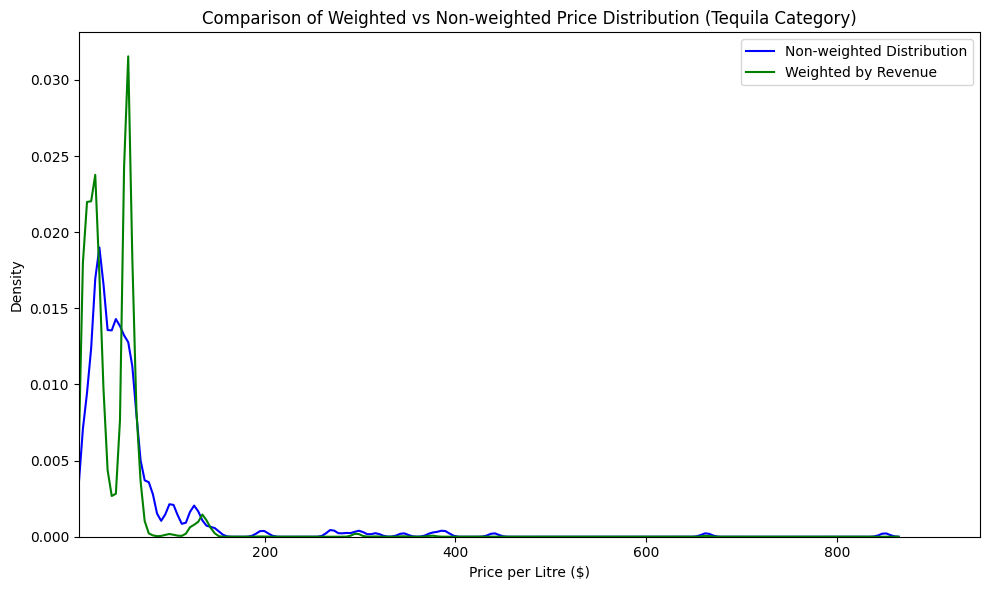

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Remove missing values from both 'price_per_litre' and 'tot_revenue_vendors'
tequila = tequila.dropna(subset=['price_per_litre', 'tot_revenue_vendors'])

# Extract price and revenue data as NumPy arrays
price_per_litre = tequila["price_per_litre"].values
revenue_weights = tequila["tot_revenue_vendors"].values

# Plot the weighted and non-weighted KDE plots
plt.figure(figsize=(10, 6))

# Non-weighted KDE plot (each price per litre contributes equally)
sns.kdeplot(x=price_per_litre, bw_adjust=0.2, clip=(5, None), label="Non-weighted Distribution", color="blue")

# Weighted KDE plot (price per litre weighted by total revenue)
sns.kdeplot(x=price_per_litre, weights=revenue_weights, bw_adjust=0.2, clip=(5, None), label="Weighted by Revenue", color="green")

# Customize plot labels and titles
plt.title("Comparison of Weighted vs Non-weighted Price Distribution (Tequila Category)")
plt.xlabel("Price per Litre ($)")
plt.ylabel("Density")
plt.legend()

# Set explicit x-axis limits to avoid negative prices being shown
plt.xlim(5, max(price_per_litre)+100 )

# Show the plot
plt.tight_layout()
plt.show()


In [100]:
#calculate cagr per price bin
cagr_per_bin= tequila.loc[:,["bin",2018,2019,2020,2021]].reset_index().drop(columns=["category_name","item_description"]).groupby("bin").sum()


# Define a function to calculate CAGR
def calculate_cagr(row):

    # Identify the first non-zero and non-null value
    start_year = row[row > 0].first_valid_index()
    end_year = 2021  
    
    # If there's a valid start year and the end year value is also valid
    
    if start_year and row[end_year] >0 and len(row[row > 0])>1:
        start_value = row[start_year]
        end_value = row[end_year]
        n_periods = end_year - start_year
        
        # Calculate CAGR
        cagr = ((end_value / start_value) ** (1 / n_periods) - 1) * 100
        return cagr
    else:
        return np.nan 


# Apply the CAGR calculation row-wise
cagr_per_bin['cagr'] = cagr_per_bin.apply(calculate_cagr, axis=1).fillna(0)
cagr_per_bin = cagr_per_bin.reset_index().loc[:,["bin","cagr"]]
cagr_per_bin

/var/folders/np/x7dj_x5x1yx89qsg0fp5bq8c0000gr/T/ipykernel_16518/1572310451.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cagr_per_bin= tequila.loc[:,["bin",2018,2019,2020,2021]].reset_index().drop(columns=["category_name","item_description"]).groupby("bin").sum()


,bin,cagr
0,"(0, 20]",5.894564
1,"(20, 40]",16.343861
2,"(40, 60]",26.204001
3,"(60, 80]",19.061923
4,"(80, 100]",183.893512
5,"(100, 120]",-18.552587
6,"(120, 140]",73.922530
7,"(140, 160]",107.982738
8,"(160, 180]",0.000000
9,"(180, 200]",151.288759


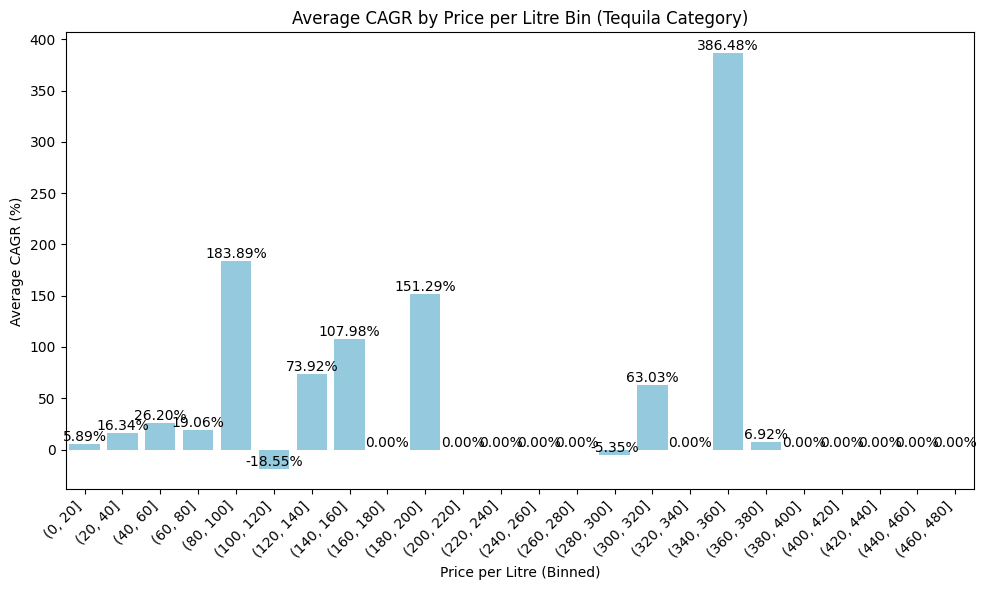

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot the average CAGR per price bin
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cagr_per_bin["bin"].astype(str), y=cagr_per_bin["cagr"], color="skyblue")

# Add data labels for each bar
for index, row in cagr_per_bin.iterrows():
    ax.text(index, row["cagr"], f'{row["cagr"]:.2f}%', ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.title("Average CAGR by Price per Litre Bin (Tequila Category)")
plt.xlabel("Price per Litre (Binned)")
plt.ylabel("Average CAGR (%)")
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()


/var/folders/np/x7dj_x5x1yx89qsg0fp5bq8c0000gr/T/ipykernel_16518/3114246639.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_distribution = tequila.groupby("bin")["tot_revenue_vendors"].sum().reset_index()
/var/folders/np/x7dj_x5x1yx89qsg0fp5bq8c0000gr/T/ipykernel_16518/3114246639.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


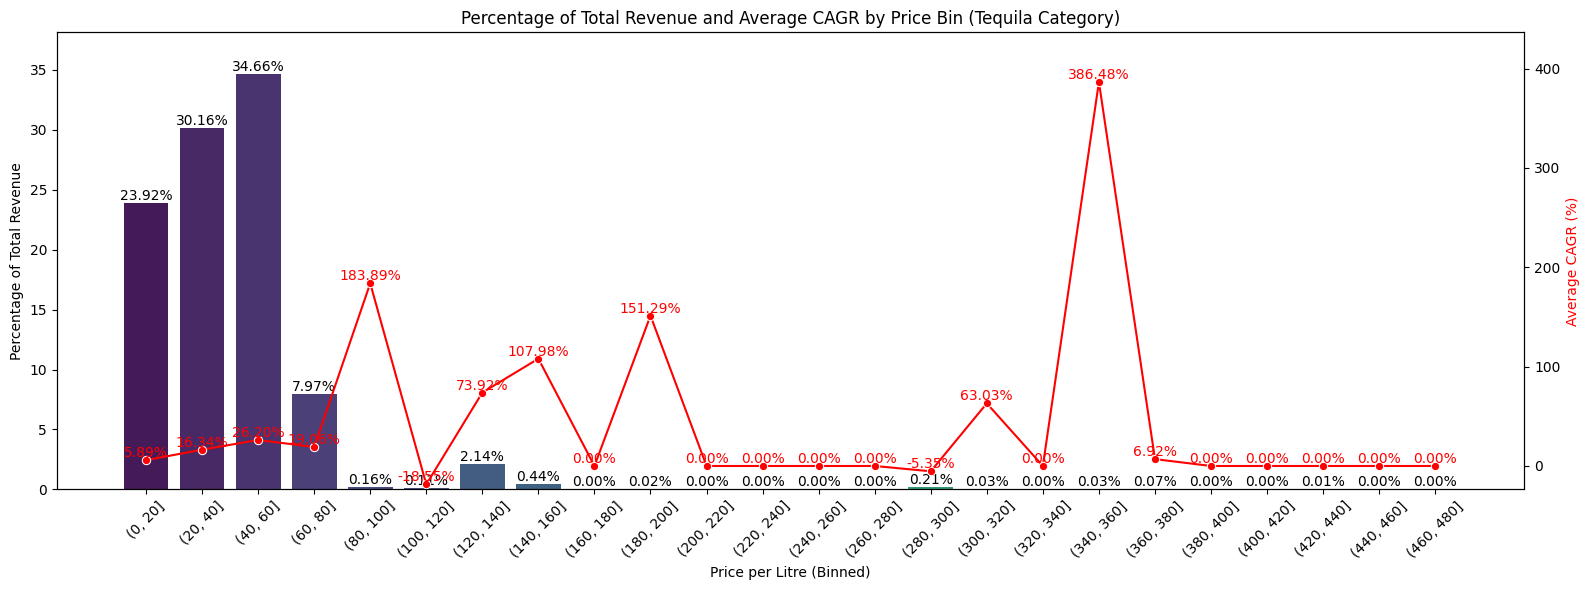

,percentage_of_total,cagr
bin,,
"(0, 20]",23.915915,5.894564
"(20, 40]",30.163083,16.343861
"(40, 60]",34.661969,26.204001
"(60, 80]",7.971515,19.061923
"(80, 100]",0.160173,183.893512
"(100, 120]",0.112349,-18.552587
"(120, 140]",2.141249,73.922530
"(140, 160]",0.444358,107.982738
"(160, 180]",0.000000,0.000000


In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Calculate the total revenue percentage for each price bin
revenue_distribution = tequila.groupby("bin")["tot_revenue_vendors"].sum().reset_index()
total_revenue = tequila["tot_revenue_vendors"].sum()
revenue_distribution["percentage_of_total"] = (revenue_distribution["tot_revenue_vendors"] / total_revenue) * 100


# Create a plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(16, 6))

# Plot the percentage of total revenue as a bar chart on the primary y-axis
sns.barplot(
    x=revenue_distribution["bin"].astype(str), 
    y=revenue_distribution["percentage_of_total"], 
    palette="viridis", 
    ax=ax1
)
ax1.set_xlabel("Price per Litre (Binned)")
ax1.set_ylabel("Percentage of Total Revenue", color="black")
ax1.set_ylim(0, max(revenue_distribution["percentage_of_total"]) * 1.1)  # Scale y-axis for better visibility
ax1.set_title("Percentage of Total Revenue and Average CAGR by Price Bin (Tequila Category)")
ax1.tick_params(axis='x', rotation=45)

# Add data labels for each bar
for index, row in revenue_distribution.iterrows():
    ax1.text(index, row["percentage_of_total"], f'{row["percentage_of_total"]:.2f}%', ha="center", va="bottom", fontsize=10)

# Create a secondary y-axis for the line plot of average CAGR
ax2 = ax1.twinx()
sns.lineplot(
    x=cagr_per_bin["bin"].astype(str), 
    y=cagr_per_bin["cagr"], 
    color="red", 
    marker="o", 
    ax=ax2
)
ax2.set_ylabel("Average CAGR (%)", color="red")
ax2.set_ylim(cagr_per_bin["cagr"].min() - 5, cagr_per_bin["cagr"].max() + 50)  # Set limits for clarity

# Add data labels for the line plot points
for index, row in cagr_per_bin.iterrows():
    ax2.text(index, row["cagr"], f'{row["cagr"]:.2f}%', color="red", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()
revenue_distribution.loc[:,["bin","percentage_of_total"]].set_index("bin").join(cagr_per_bin.set_index("bin"))

##### Whisky

/var/folders/np/x7dj_x5x1yx89qsg0fp5bq8c0000gr/T/ipykernel_16518/1065670068.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whisky["price_percentile"] = whisky["price_per_litre"].apply(lambda price: calculate_percentile(price, whisky_price_range))
/var/folders/np/x7dj_x5x1yx89qsg0fp5bq8c0000gr/T/ipykernel_16518/1065670068.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whisky["bin"] = bins
/var/folders/np/x7dj_x5x1yx89qsg0fp5bq8c0000gr/T/ipykernel_16518/1065670068.py:26: FutureWarning: The default

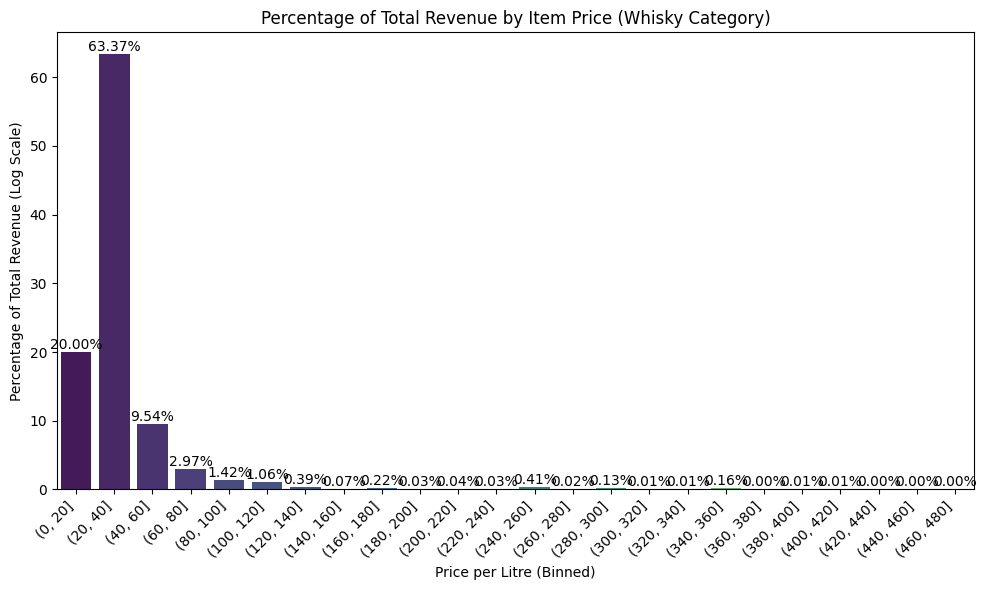

np.float64(99.90996711702634)

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Filter data for the 'whisky' category
whisky = sub_category_timeseries.xs('whisky', level='product_family')

# Convert price per litre to a NumPy array for further analysis
whisky_price_range = whisky["price_per_litre"].values

# Define a function to calculate the percentile rank manually using NumPy
def calculate_percentile(price, price_range):
    return np.sum(price_range <= price) / len(price_range)

# Apply the percentile calculation for each price
whisky["price_percentile"] = whisky["price_per_litre"].apply(lambda price: calculate_percentile(price, whisky_price_range))

# Create integer-based bins for the price per litre
bin_edges = list(range(0, 500, 20)) # Bins like [0, 100), [100, 200), ..., [500, 600)
bins = pd.cut(whisky["price_per_litre"], bins=bin_edges)
whisky["bin"] = bins

# Aggregate the total revenue by these price bins
revenue_distribution = whisky.groupby(bins)["tot_revenue_vendors"].sum().reset_index()

# Calculate the total revenue for the entire whisky category
total_revenue = whisky["tot_revenue_vendors"].sum()

# Calculate the percentage of total revenue for each price bin
revenue_distribution["percentage_of_total"] = (revenue_distribution["tot_revenue_vendors"] / total_revenue) * 100

# Plot the percentage of total revenue with a log scale
plt.figure(figsize=(10, 6))  # Set a manageable figure size
ax = sns.barplot(x=revenue_distribution["price_per_litre"].astype(str), y=revenue_distribution["percentage_of_total"], palette="viridis")

# Apply log scale to the y-axis
#ax.set_yscale('log')

# Add data labels for each bar
for index, row in revenue_distribution.iterrows():
    ax.text(index, row["percentage_of_total"], f'{row["percentage_of_total"]:.2f}%', color='black', ha="center", va="bottom")

# Adjust xticks to prevent overlap and avoid generating large image sizes
plt.xticks(rotation=45, ha="right")
ax.set_xticks(ax.get_xticks())  # Show every other tick to reduce clutter

# Customize plot labels and titles
plt.title("Percentage of Total Revenue by Item Price (Whisky Category)")
plt.xlabel("Price per Litre (Binned)")
plt.ylabel("Percentage of Total Revenue (Log Scale)")
plt.tight_layout()

# Show the plot
plt.show()
revenue_distribution["percentage_of_total"].sum()

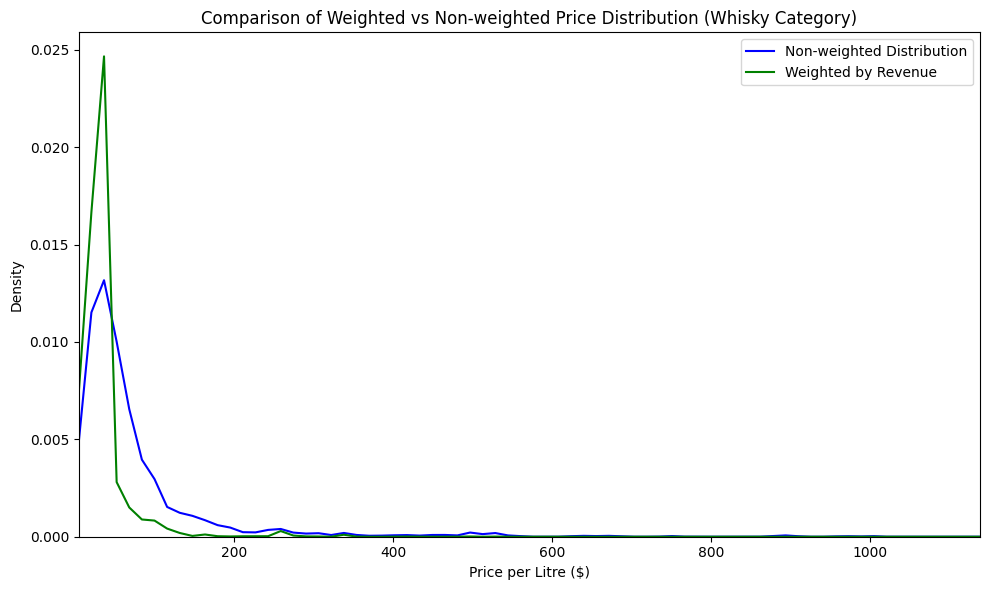

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Remove missing values from both 'price_per_litre' and 'tot_revenue_vendors'
whisky = whisky.dropna(subset=['price_per_litre', 'tot_revenue_vendors'])

# Extract price and revenue data as NumPy arrays
price_per_litre = whisky["price_per_litre"].values
revenue_weights = whisky["tot_revenue_vendors"].values

# Plot the weighted and non-weighted KDE plots
plt.figure(figsize=(10, 6))

# Non-weighted KDE plot (each price per litre contributes equally)
sns.kdeplot(x=price_per_litre, bw_adjust=0.2, clip=(5, None), label="Non-weighted Distribution", color="blue")

# Weighted KDE plot (price per litre weighted by total revenue)
sns.kdeplot(x=price_per_litre, weights=revenue_weights, bw_adjust=0.2, clip=(5, None), label="Weighted by Revenue", color="green")

# Customize plot labels and titles
plt.title("Comparison of Weighted vs Non-weighted Price Distribution (Whisky Category)")
plt.xlabel("Price per Litre ($)")
plt.ylabel("Density")
plt.legend()

# Set explicit x-axis limits to avoid negative prices being shown
plt.xlim(5, max(price_per_litre) - 2000)

# Show the plot
plt.tight_layout()
plt.show()


In [105]:
#calculate cagr per price bin
cagr_per_bin= whisky.loc[:,["bin",2018,2019,2020,2021]].reset_index().drop(columns=["category_name","item_description"]).groupby("bin").sum()


# Define a function to calculate CAGR
def calculate_cagr(row):

    # Identify the first non-zero and non-null value
    start_year = row[row > 0].first_valid_index()
    end_year = 2021  
    
    # If there's a valid start year, at least 2 years of revenue and the end year value is also valid
    
    if start_year and row[end_year] >0 and len(row[row > 0])>1:
        start_value = row[start_year]
        end_value = row[end_year]
        n_periods = end_year - start_year
        
        # Calculate CAGR
        cagr = ((end_value / start_value) ** (1 / n_periods) - 1) * 100
        return cagr
    else:
        return np.nan 


# Apply the CAGR calculation row-wise
cagr_per_bin['cagr'] = cagr_per_bin.apply(calculate_cagr, axis=1).fillna(0)
cagr_per_bin = cagr_per_bin.reset_index().loc[:,["bin","cagr"]]
cagr_per_bin

/var/folders/np/x7dj_x5x1yx89qsg0fp5bq8c0000gr/T/ipykernel_16518/2852260066.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cagr_per_bin= whisky.loc[:,["bin",2018,2019,2020,2021]].reset_index().drop(columns=["category_name","item_description"]).groupby("bin").sum()


,bin,cagr
0,"(0, 20]",-1.981057
1,"(20, 40]",5.861434
2,"(40, 60]",16.514387
3,"(60, 80]",14.170067
4,"(80, 100]",28.227560
5,"(100, 120]",63.581004
6,"(120, 140]",11.354730
7,"(140, 160]",69.856288
8,"(160, 180]",2.122583
9,"(180, 200]",43.620124


/var/folders/np/x7dj_x5x1yx89qsg0fp5bq8c0000gr/T/ipykernel_16518/4181963556.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_distribution = whisky.groupby("bin")["tot_revenue_vendors"].sum().reset_index()
/var/folders/np/x7dj_x5x1yx89qsg0fp5bq8c0000gr/T/ipykernel_16518/4181963556.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


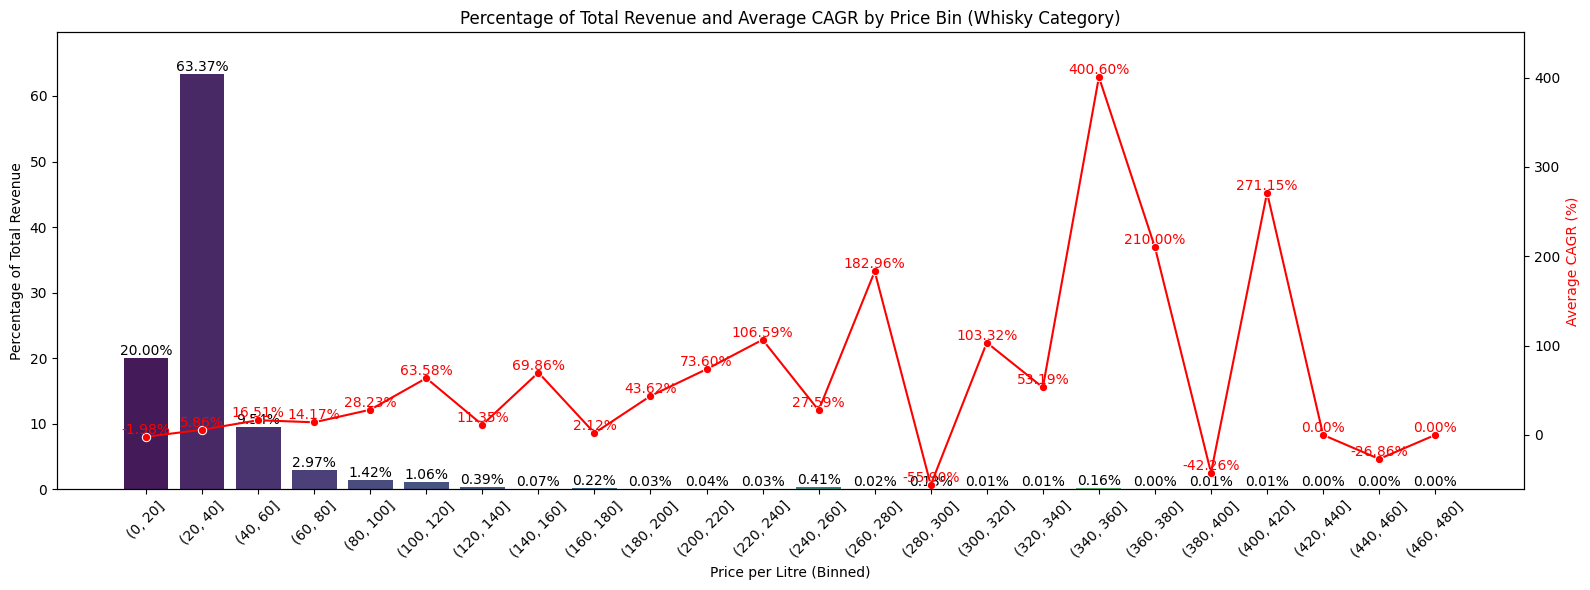

,percentage_of_total,cagr
bin,,
"(0, 20]",20.001499,-1.981057
"(20, 40]",63.371223,5.861434
"(40, 60]",9.542987,16.514387
"(60, 80]",2.965529,14.170067
"(80, 100]",1.422481,28.227560
"(100, 120]",1.055887,63.581004
"(120, 140]",0.394729,11.354730
"(140, 160]",0.070301,69.856288
"(160, 180]",0.215175,2.122583


In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Calculate the total revenue percentage for each price bin
revenue_distribution = whisky.groupby("bin")["tot_revenue_vendors"].sum().reset_index()
total_revenue = whisky["tot_revenue_vendors"].sum()
revenue_distribution["percentage_of_total"] = (revenue_distribution["tot_revenue_vendors"] / total_revenue) * 100


# Create a plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(16, 6))

# Plot the percentage of total revenue as a bar chart on the primary y-axis
sns.barplot(
    x=revenue_distribution["bin"].astype(str), 
    y=revenue_distribution["percentage_of_total"], 
    palette="viridis", 
    ax=ax1
)
ax1.set_xlabel("Price per Litre (Binned)")
ax1.set_ylabel("Percentage of Total Revenue", color="black")
ax1.set_ylim(0, max(revenue_distribution["percentage_of_total"]) * 1.1)  # Scale y-axis for better visibility
ax1.set_title("Percentage of Total Revenue and Average CAGR by Price Bin (Whisky Category)")
ax1.tick_params(axis='x', rotation=45)

# Add data labels for each bar
for index, row in revenue_distribution.iterrows():
    ax1.text(index, row["percentage_of_total"], f'{row["percentage_of_total"]:.2f}%', ha="center", va="bottom", fontsize=10)

# Create a secondary y-axis for the line plot of average CAGR
ax2 = ax1.twinx()
sns.lineplot(
    x=cagr_per_bin["bin"].astype(str), 
    y=cagr_per_bin["cagr"], 
    color="red", 
    marker="o", 
    ax=ax2
)
ax2.set_ylabel("Average CAGR (%)", color="red")
ax2.set_ylim(cagr_per_bin["cagr"].min() - 5, cagr_per_bin["cagr"].max() + 50)  # Set limits for clarity

# Add data labels for the line plot points
for index, row in cagr_per_bin.iterrows():
    ax2.text(index, row["cagr"], f'{row["cagr"]:.2f}%', color="red", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()
revenue_distribution.loc[:,["bin","percentage_of_total"]].set_index("bin").join(cagr_per_bin.set_index("bin"))

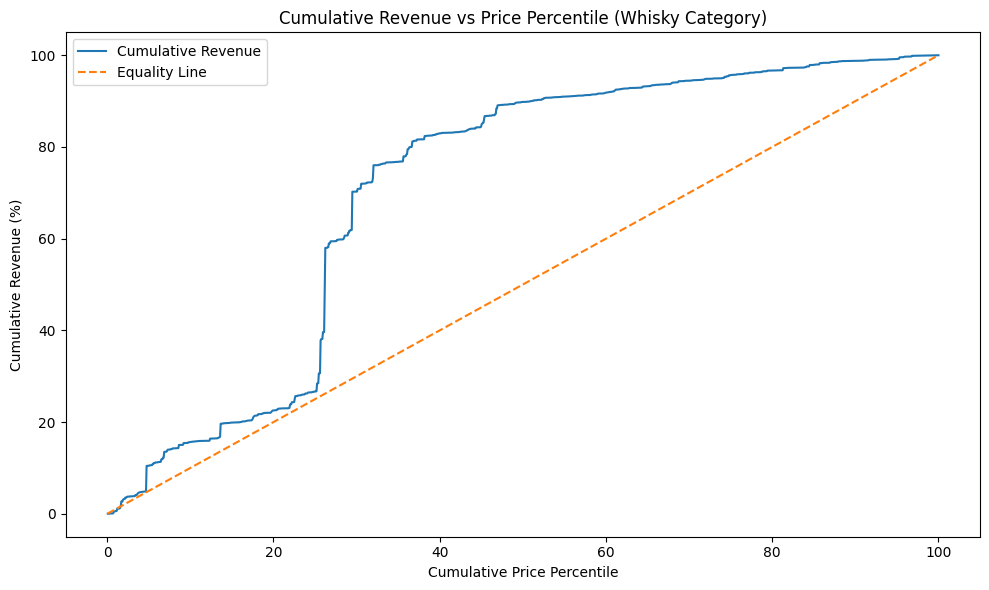

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sort products by price per litre
whisky = whisky.sort_values(by="price_per_litre")

# Calculate cumulative revenue
whisky["cumulative_revenue"] = whisky["tot_revenue_vendors"].cumsum()
whisky["cumulative_revenue_pct"] = whisky["cumulative_revenue"] / whisky["tot_revenue_vendors"].sum() * 100

# Calculate cumulative price percentile
whisky["price_percentile"] = np.arange(1, len(whisky)+1) / len(whisky) * 100

# Plot the cumulative revenue vs price percentile
plt.figure(figsize=(10, 6))
plt.plot(whisky["price_percentile"], whisky["cumulative_revenue_pct"], label="Cumulative Revenue")
plt.plot([0, 100], [0, 100], linestyle="--", label="Equality Line")  # For comparison
plt.xlabel("Cumulative Price Percentile")
plt.ylabel("Cumulative Revenue (%)")
plt.title("Cumulative Revenue vs Price Percentile (Whisky Category)")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [108]:
# Sort by price per litre
whisky_sorted = whisky.sort_values(by="price_per_litre", ascending=False)

# Calculate cumulative revenue
whisky_sorted["cumulative_revenue"] = whisky_sorted["tot_revenue_vendors"].cumsum()

# Calculate the total revenue
total_revenue = whisky_sorted["tot_revenue_vendors"].sum()

# Find the point where cumulative revenue is 80% of the total revenue
pareto_threshold = total_revenue * 0.80
top_20pct_revenue = whisky_sorted[whisky_sorted["cumulative_revenue"] <= pareto_threshold]

# Output the result
top_20pct_contribution = len(top_20pct_revenue) / len(whisky_sorted) * 100
print(f"Top {top_20pct_contribution:.2f}% of products contribute to 80% of total revenue.")



Top 84.02% of products contribute to 80% of total revenue.
